In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
# Carga de tabla con explicaciones de cada columna

col_explicacion = pd.read_csv('descriptions_for_ column.csv', encoding='latin-1')
col_explicacion = col_explicacion.drop(columns=['Col_names_english', 
                                                'Descriptions_english'])
print(col_explicacion)

      Col_names_spanish                               Descriptions_spanish
0     Fecha de Registro                     Fecha de registro del divorcio
1                  Tipo  Necesario cuando alguna de las partes no acept...
2          Nacionalidad                        Nacionalidad del divorciado
3             F_Naci_Do                 Fecha de nacimiento del divorciado
4            LocNaci_Do             Localidad de nacimiento del divorciado
5           MpioNaci_Do             Municipio de nacimiento del divorciado
6           EFedNaci_Do    Entidad Federativa de nacimiento del divorciado
7           PaisNaci_Do                 PaÃ­s de nacimiento del divorciado
8                  Edad                                Edad del divorciado
9            MpioHab_Do   Municipio del domicilio que habita el divorciado
10           EFedHab_Do  Entidad federativa del domicilio que habita el...
11           PaisHab_Do    PaÃ­s del domicilio en que habita el divorciado
12            ElIngreso  

In [344]:
# Carga de DF + renombre de columnas + descarte de columnas 

df = pd.read_csv('divorces_2000-2015_original.csv', 
                 parse_dates=['Fecha de Registro', 'F_Naci_Do', 'F_Naci_Da', 'Fecha'],
                 date_format='%d/%m/%y')

df = df.rename(columns={'Ocupaci√≥n_Do': 'Ocupacion_Do', 
                   'Ocupaci√≥n_Da': 'Ocupacion_Da',
                   'Matri_A√±os': 'Matri_Años',
                   'Edad': 'Edad_Do', 'Edad2': 'Edad_Da',
                   'Nacionalidad': 'Nacionalidad_Do', 
                   'Nacionalidad2': 'Nacionalidad_Da', 'Tipo':'Tipo_divor',
                   'Fecha': 'Fecha_matri', 'Fecha de Registro': 'Fecha_divor'})

df = df.drop(columns=['LocNaci_Do', 'MpioNaci_Do', 'EFedNaci_Do', 'MpioHab_Do',
                      'EFedHab_Do', 'LocHabi_Do', 'LocNaci_Da', 'MpioNaci_Da', 
                      'EFedNaci_Da', 'MpioHab_Da','EFedHab_Da', 'LocHabi_Da',
                      'Fecha de Registro 2', 'Localidad', 'Municipio', 
                      'Matri_Meses'])

display(df.columns)

Index(['Fecha_divor', 'Tipo_divor', 'Nacionalidad_Do', 'F_Naci_Do',
       'PaisNaci_Do', 'Edad_Do', 'PaisHab_Do', 'ElIngreso', 'Ocupacion_Do',
       'Nacionalidad_Da', 'F_Naci_Da', 'PaisNaci_Da', 'Edad_Da', 'PaisHab_Da',
       'Ocupacion_Da', 'EllaIngreso', 'Fecha_matri', 'Entidad Federativa',
       'ElEscolaridad', 'ElTrabajo', 'EllaEscolaridad', 'EllaTrabajo',
       'Matri_Años', 'Num_Hijos', 'Custodia'],
      dtype='object')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha_divor         4923 non-null   datetime64[ns]
 1   Tipo_divor          4923 non-null   object        
 2   Nacionalidad_Do     4922 non-null   object        
 3   F_Naci_Do           4542 non-null   datetime64[ns]
 4   PaisNaci_Do         4796 non-null   object        
 5   Edad_Do             4816 non-null   float64       
 6   PaisHab_Do          4599 non-null   object        
 7   ElIngreso           3504 non-null   float64       
 8   Ocupacion_Do        4394 non-null   object        
 9   Nacionalidad_Da     4920 non-null   object        
 10  F_Naci_Da           4471 non-null   datetime64[ns]
 11  PaisNaci_Da         4784 non-null   object        
 12  Edad_Da             4772 non-null   float64       
 13  PaisHab_Da          4618 non-null   object      

In [346]:
df.isnull().sum()

Fecha_divor              0
Tipo_divor               0
Nacionalidad_Do          1
F_Naci_Do              381
PaisNaci_Do            127
Edad_Do                107
PaisHab_Do             324
ElIngreso             1419
Ocupacion_Do           529
Nacionalidad_Da          3
F_Naci_Da              452
PaisNaci_Da            139
Edad_Da                151
PaisHab_Da             305
Ocupacion_Da           578
EllaIngreso           2119
Fecha_matri              0
Entidad Federativa       0
ElEscolaridad          304
ElTrabajo              356
EllaEscolaridad        380
EllaTrabajo            417
Matri_Años             235
Num_Hijos             1912
Custodia              2851
dtype: int64

In [347]:
# Manejo de Nulos Cualitativos (llenados con la moda)
col_cualitativas = ['PaisNaci_Do', 'PaisNaci_Da', 'Nacionalidad_Do',
                    'Nacionalidad_Da', 'PaisHab_Do', 'PaisHab_Da',
                    'Ocupacion_Do', 'Ocupacion_Da', 'ElEscolaridad',
                    'EllaEscolaridad', 'ElTrabajo', 'EllaTrabajo', 'Custodia',
                    'F_Naci_Do', 'F_Naci_Da']

for col in col_cualitativas:
    df[col] = df[col].fillna(df[col].mode()[0])

# Manejo de Nulos Cuantitativos (llenados con la mediana)
col_cuantitativas1 = ['Edad_Do', 'Edad_Da']

for col in col_cuantitativas1:
    df[col] = df[col].fillna(df[col].median())
    
# Manejo de Años de Matrimonio nulos, se calculan con
# (fecha de divorcio - fecha de matrimonio) redondeados sin decimales
dif_dias = (df['Fecha_divor'] - df['Fecha_matri']).dt.days
years_casados = round(dif_dias / 365.25, 0) #.25 para considerar años bisiestos
# Se asegura que el valor sea superior a 0, de no serlo se mantendrá como NaN
years_casados = years_casados[years_casados > 0]
df['Matri_Años'] = df['Matri_Años'].fillna(years_casados)

# Se asumen que los NaN en Num_hijos quieren decir 0 hijos (mas del 40% de filas)
col_cuantitativas2 = ['ElIngreso', 'EllaIngreso', 'Num_Hijos']
for col in col_cuantitativas2:
    df[col] = df[col].fillna(0)

In [385]:
# Nuevas Columnas / Ingeniería de Características

# Columna diferencia de Edades
df['Dif_Edades'] = (df['Edad_Do'] - df['Edad_Da']).abs()

# Columna Edad Promedio Pareja
df['Edad_Pareja'] = (df['Edad_Do'] + df['Edad_Da']) / 2

# Columna Genero Mayor
df['Genero_mayor_edad'] = np.where(df['Edad_Do'] > df['Edad_Da'], 'M',
                              np.where(df['Edad_Do'] < df['Edad_Da'], 'F',
                                       'Igual'))

df['Genero_mayor_ingresos'] = np.where(df['ElIngreso'] > df['EllaIngreso'], 'M',
                                np.where(df['ElIngreso'] < df['EllaIngreso'], 'F',
                                         'Igual'))

# Columna Año
df['Año'] = df['Fecha_divor'].dt.year

# Proporcion de Custodia
pd.crosstab(df['ElIngreso'], df['Custodia'], normalize='index')

Custodia,MADRE,OTRO,PADRE
ElIngreso,,,
0.0,0.98802,0.002819,0.009161
2.4,1.00000,0.000000,0.000000
3.0,1.00000,0.000000,0.000000
5.0,1.00000,0.000000,0.000000
10.0,1.00000,0.000000,0.000000
...,...,...,...
563218.0,1.00000,0.000000,0.000000
708652.0,1.00000,0.000000,0.000000
750000.0,1.00000,0.000000,0.000000


In [349]:
# Ajuste de etiquetas
autoempleado = ['ElTrabajo', 'EllaTrabajo']
for col in autoempleado:
    df[col] = df[col].apply(lambda x: 'TRABAJA EN LA CALLE' 
            if x == 'TRABAJADOR POR SU PROPIA CUENTA O EN VIA PUBLICA' 
            or x == 'TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA ' else x)
    df[col] = df[col].apply(lambda x: 'VOLUNTARIO' 
                            if x == 'TRABAJADOR NO REMUNERADO' else x)

In [350]:
# Creación de DATAFRAMES Extra

# Creación de DF con Ingresos superiores al mínimo aproximado en año 2000
salario_minimo_2000 = 1152.76
umbral_outlier_superior = 100000
df_con_ingreso_el = df.query('ElIngreso > @salario_minimo_2000 \
                          and ElIngreso < @umbral_outlier_superior')

df_con_ingreso_ella = df.query('EllaIngreso > @salario_minimo_2000 \
                          and EllaIngreso < @umbral_outlier_superior')

df_con_ingresos = df.query('(ElIngreso > @salario_minimo_2000 \
                          and ElIngreso < @umbral_outlier_superior) or \
                            (EllaIngreso > @salario_minimo_2000 \
                          and EllaIngreso < @umbral_outlier_superior)')

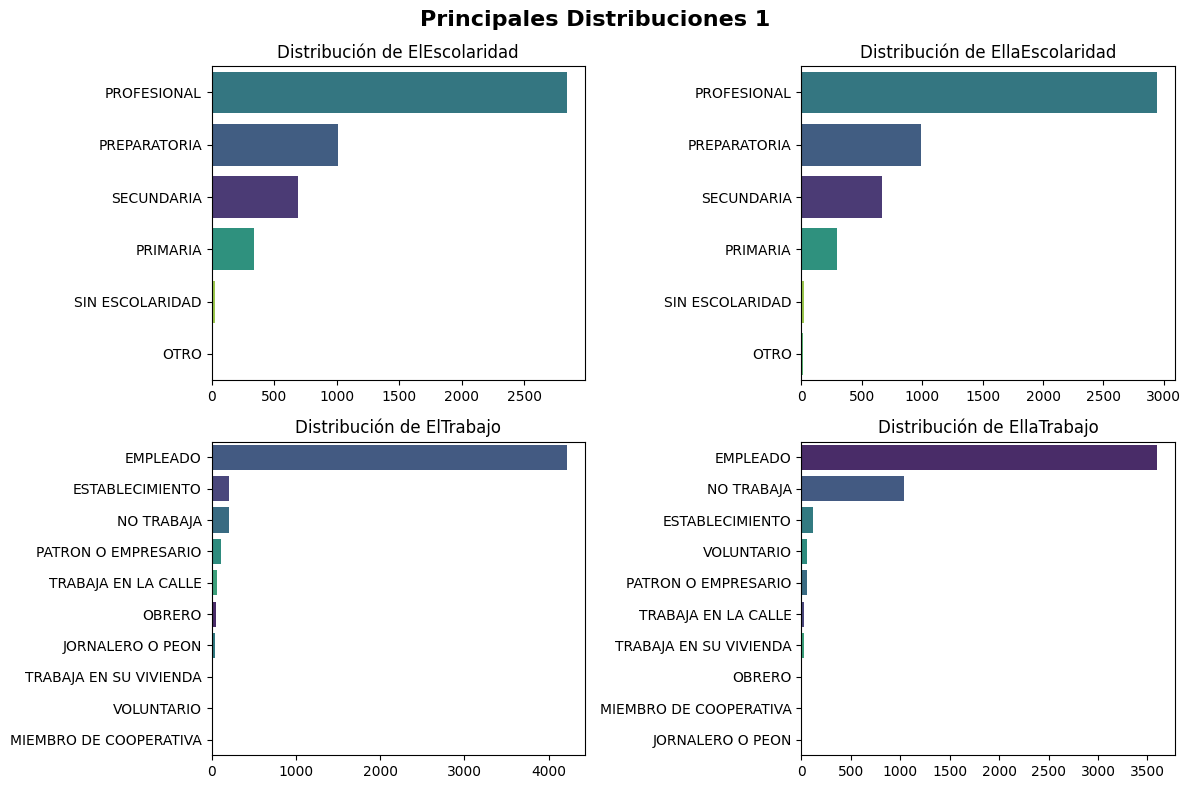

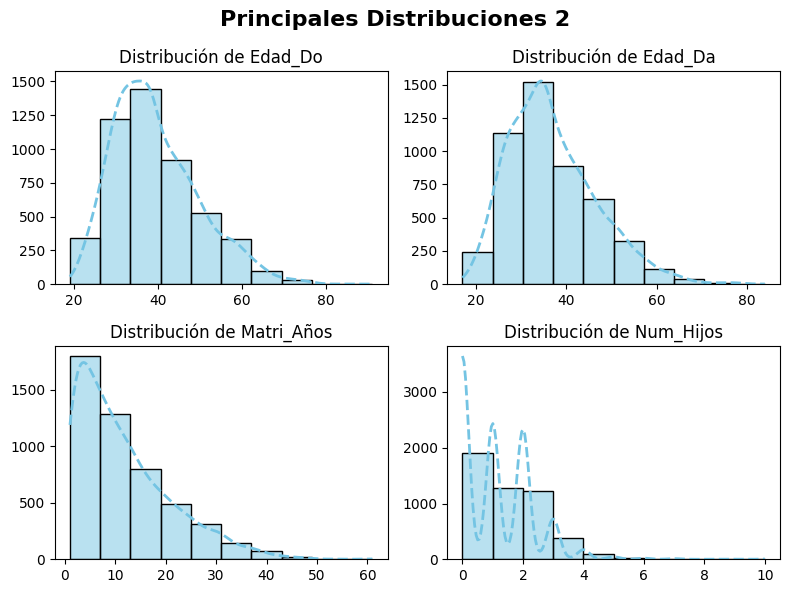

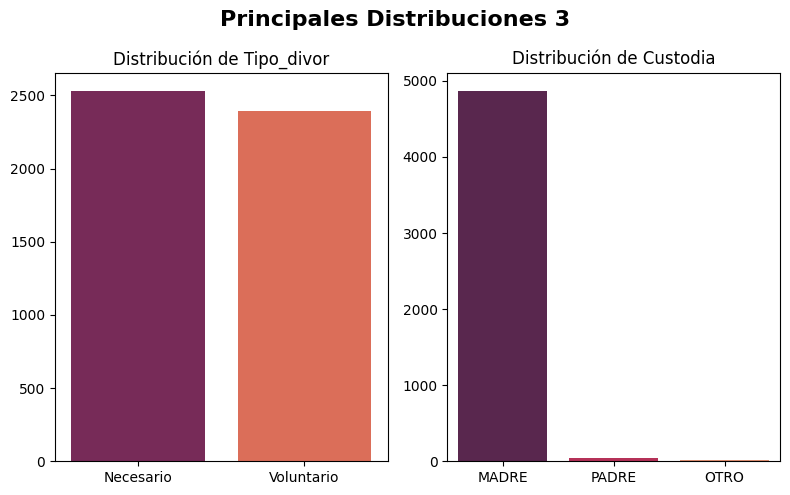

In [351]:
# Principales Distribuciones1
dist_col_cual = ['ElEscolaridad', 'EllaEscolaridad', 'ElTrabajo', 'EllaTrabajo']

fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig1.suptitle('Principales Distribuciones 1', fontsize=16, fontweight='bold')
axes1 = ax1.flatten()

for i, col in enumerate(dist_col_cual):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, 
                  palette='viridis', hue=col, ax=axes1[i])
    axes1[i].set_title(f'Distribución de {col}')
    axes1[i].set_xlabel('')
    axes1[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Pricipales Distribuciones2
dist_col_cuant = ['Edad_Do', 'Edad_Da', 'Matri_Años', 'Num_Hijos']

fig2, ax2 = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
fig2.suptitle('Principales Distribuciones 2', fontsize=16, fontweight='bold')
axes2 = ax2.flatten()

for i, col in enumerate(dist_col_cuant):
    sns.histplot(data=df, x=col, ax=axes2[i], bins=10, color="#74c4e3", 
                 kde=True, line_kws={'linestyle': '--','linewidth': 2})
    axes2[i].set_title(f'Distribución de {col}')
    axes2[i].set_xlabel('')
    axes2[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Principales Distribuciones 3
dist_col_cual2 = ['Tipo_divor', 'Custodia']

fig3, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
fig3.suptitle('Principales Distribuciones 3', fontsize=16, fontweight='bold')
axes3 = ax3.flatten()

for i, col in enumerate(dist_col_cual2):
    sns.countplot(data=df, x=col, ax= axes3[i], order=df[col].value_counts().index,
                  palette='rocket', hue=col)
    axes3[i].set_title(f'Distribución de {col}')
    axes3[i].set_xlabel('')
    axes3[i].set_ylabel('')

plt.tight_layout()
plt.show()

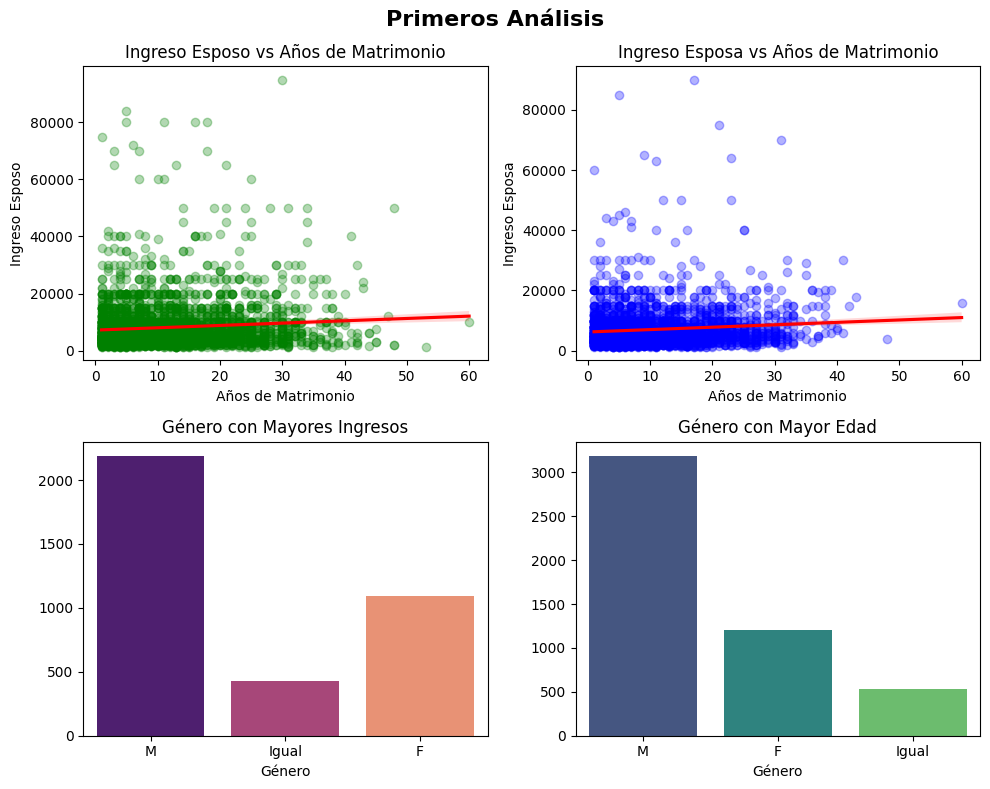

In [352]:
fig4, ax4 = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
fig4.suptitle('Primeros Análisis', fontsize=16, fontweight='bold')

# GRÁFICO 1
sns.regplot(data=df_con_ingreso_el, x='Matri_Años', y='ElIngreso', ax=ax4[0][0],
            line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3, 'color':'green'})
ax4[0][0].set_title('Ingreso Esposo vs Años de Matrimonio')
ax4[0][0].set_xlabel('Años de Matrimonio')
ax4[0][0].set_ylabel('Ingreso Esposo')

# GRÁFICO 2
sns.regplot(data=df_con_ingreso_ella, x='Matri_Años', y='EllaIngreso', ax=ax4[0][1], 
            line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3, 'color':'blue'})
ax4[0][1].set_title('Ingreso Esposa vs Años de Matrimonio')
ax4[0][1].set_xlabel('Años de Matrimonio')
ax4[0][1].set_ylabel('Ingreso Esposa')

# GRÁFICO 3
sns.countplot(data=df_con_ingresos, x='Genero_mayor_ingresos', ax=ax4[1][0], palette='magma',
              hue='Genero_mayor_ingresos')
ax4[1][0].set_title('Género con Mayores Ingresos')
ax4[1][0].set_xlabel('Género')
ax4[1][0].set_ylabel('')

# GRÁFICO 4
sns.countplot(data=df, x='Genero_mayor_edad', ax=ax4[1][1], palette='viridis',
              hue='Genero_mayor_edad')
ax4[1][1].set_title('Género con Mayor Edad')
ax4[1][1].set_xlabel('Género')
ax4[1][1].set_ylabel('')

plt.tight_layout()
plt.show()